Customer Churn Prediction using ANN

In [44]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [45]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [46]:
print(df.shape)

(10000, 14)


In [47]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [49]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [50]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [51]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [52]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [53]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [55]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [56]:
X_train.shape

(8000, 10)

In [57]:
from sklearn.preprocessing import StandardScaler

import pandas as pd
from sklearn.preprocessing import StandardScaler

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [58]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [59]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [60]:
model = Sequential()

model = Sequential([
    Input(shape=(11,)),
    Dense(11, activation='relu'),
    Dense(11, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [61]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [66]:
history = model.fit(X_train_scaled, y_train, epochs=30, validation_split = 0.2)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7707 - loss: 0.5783 - val_accuracy: 0.7975 - val_loss: 0.4832
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7986 - loss: 0.4723 - val_accuracy: 0.7975 - val_loss: 0.4498
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8087 - loss: 0.4320 - val_accuracy: 0.8037 - val_loss: 0.4347
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8060 - loss: 0.4361 - val_accuracy: 0.8094 - val_loss: 0.4234
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8207 - loss: 0.4167 - val_accuracy: 0.8119 - val_loss: 0.4130
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8193 - loss: 0.4115 - val_accuracy: 0.8231 - val_loss: 0.4003
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8276 - loss: 0.4103 - val_accuracy: 0.8313 - val_loss: 0.3843
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8359 - loss: 0.3878 - val_accuracy: 0.

In [67]:
model.layers[1].get_weights()

[array([[ 5.2774423e-01,  1.8379713e-03,  5.2532893e-01,  5.7314807e-01,
         -4.6627423e-01,  5.9046662e-01,  4.3901640e-01, -3.2177302e-01,
         -6.6568947e-01, -1.5849777e-01,  4.4904966e-02],
        [ 1.6957806e-01, -2.5614584e-02,  5.3908312e-01,  4.5958495e-01,
         -2.7452073e-01,  1.6409993e-01,  3.0680951e-01,  3.1556514e-01,
          3.6994416e-01,  2.2531721e-01,  2.1745065e-01],
        [ 4.6455204e-01, -1.0769956e-01,  1.2501341e-01,  5.9038210e-01,
          3.6441499e-01, -2.4632020e-01, -4.4589680e-01, -8.9822181e-02,
          1.2633425e-01, -8.2756557e-02, -2.4451312e-01],
        [-3.5872769e-01, -5.8681864e-01, -4.2418605e-01,  1.6520837e-01,
          5.5037379e-01, -2.0242251e-02, -1.0420902e-02, -3.3652669e-01,
         -8.2269955e-01, -4.2966276e-01, -6.9320655e-01],
        [-6.8620905e-02, -5.1121974e-01, -1.7053506e-01,  8.0605888e-01,
          3.9816361e-02, -4.6391657e-01, -4.2113990e-01, -1.7817466e-01,
         -4.4556829e-01,  1.4794351e-0

In [68]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [69]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.862

In [71]:
import matplotlib.pyplot as plt

In [72]:
history.history

{'accuracy': [0.7893750071525574,
  0.7971875071525574,
  0.7981250286102295,
  0.8062499761581421,
  0.8167187571525574,
  0.8223437666893005,
  0.8323437571525574,
  0.8415625095367432,
  0.8482812643051147,
  0.8518750071525574,
  0.8556249737739563,
  0.8575000166893005,
  0.8565624952316284,
  0.8582812547683716,
  0.8590624928474426,
  0.8596875071525574,
  0.8610937595367432,
  0.8612499833106995,
  0.8631250262260437,
  0.8609374761581421,
  0.8631250262260437,
  0.8604687452316284,
  0.8629687428474426,
  0.8626562356948853,
  0.8618749976158142,
  0.8621875047683716,
  0.86328125,
  0.8634374737739563,
  0.8643749952316284,
  0.862500011920929],
 'loss': [0.5360422134399414,
  0.4640945792198181,
  0.44000083208084106,
  0.4281720221042633,
  0.4182596504688263,
  0.4072590172290802,
  0.39349165558815,
  0.37890729308128357,
  0.36852550506591797,
  0.3609519898891449,
  0.35592374205589294,
  0.35217970609664917,
  0.3490133583545685,
  0.3471829891204834,
  0.3448831439018

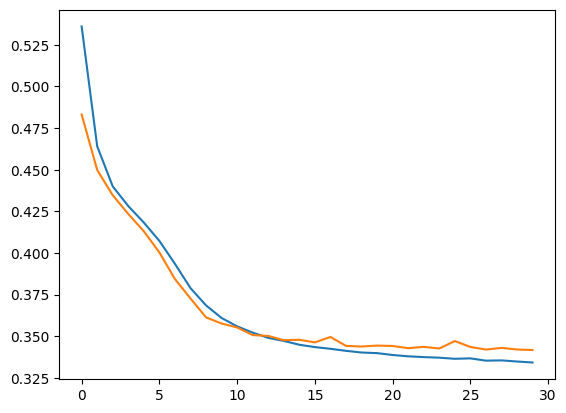

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

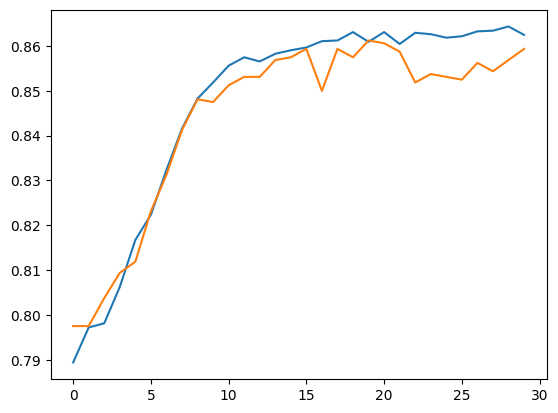

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])